# Shapiro Wilks sanity checks

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.extend(['/home/nkinsky/Documents/GitHub/NeuroPy'])
sys.path.extend(['/home/nkinsky/Documents/GitHubPrivate/pythonprogs/DataPaths/'])

import matplotlib.pyplot as plt
import numpy as np
import subjects
import pandas as pd
import seaborn as sns
from neuropy import plotting
from scipy import stats
from plotters import Plotter, get_nsd_vs_sd_df
from stats_utils import get_bootstrap_prob, get_bootstrap_prob_paired

grpdata = subjects.GroupData()

## Shapiro-Wilk plots for deviations from log-normal distribution of firing rates

Bootstrap statistic distributions at each time epoch + pvalue distributions with session means overlaid (plot but don't include in figure).


14 sessions with p_shapiro < 0.05


,session,grp,level_2,shapiro,shapiro_pvalue,skew,skew_pvalue,iqr,zt
0,0,NSD,0,0.974616,0.726148,-0.289202,0.772427,0.920392,PRE
1,0,NSD,1,0.947608,0.187463,-0.728430,0.466350,1.447428,MAZE
2,0,NSD,2,0.968614,0.565638,-0.409853,0.681914,1.089992,0-2.5
3,0,NSD,3,0.956455,0.305965,-1.467070,0.142357,0.609845,2.5-5
4,0,NSD,4,0.958865,0.348129,-0.917562,0.358848,0.696949,5-7.5
...,...,...,...,...,...,...,...,...,...
70,14,SD,0,0.957614,0.305652,-0.488979,0.624857,0.873333,PRE
71,14,SD,1,0.973154,0.667151,-0.094418,0.924777,0.995361,MAZE
72,14,SD,2,0.966039,0.479278,0.274530,0.783678,0.673026,0-2.5
73,14,SD,3,0.967291,0.510126,-0.437298,0.661895,0.804328,2.5-5


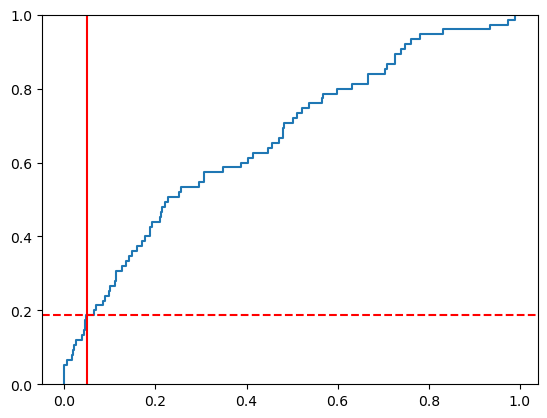

In [2]:
# Check things out and visualize S-W stats for individual sessions which are much higher than the mean because of low n.
frate_stat_df = grpdata.frate_normality_statistic_blocks_pyr_only
alpha = 0.05
nsig = np.sum(frate_stat_df.shapiro_pvalue < 0.05)
print(f'{nsig} sessions with p_shapiro < {alpha}')
_, ax = plt.subplots()
ax.ecdf(frate_stat_df.shapiro_pvalue)
ax.axvline(0.05, color='r')
ax.axhline(14/75, color='r', linestyle='--')
frate_stat_df

### Sanity checks on why p-values between raw and bootstrapped data are so different

In [8]:
# Read in raw S-W p-values
sw_stat_df = pd.read_csv(subjects.GroupData().path / "shapiro_pvalues_raw.csv")
sw_stat_df

,Unnamed: 0,grp,neuron_type,zt,shapiro_pvalue,ncells
0,0,NSD,inter,0-2.5,1.720369e-05,48
1,1,NSD,inter,2.5-5,2.830235e-05,48
2,2,NSD,inter,5-7.5,1.837562e-04,48
3,3,NSD,inter,MAZE,1.703362e-06,48
4,4,NSD,inter,PRE,4.217055e-05,48
5,5,NSD,pyr,0-2.5,6.574664e-01,441
6,6,NSD,pyr,2.5-5,3.274344e-01,441
7,7,NSD,pyr,5-7.5,6.460556e-01,441
8,8,NSD,pyr,MAZE,3.504468e-11,441
9,9,NSD,pyr,PRE,1.339980e-05,441


In [12]:
frate_df.groupby(["neuron_type", "grp", "session"]).count()

neuron_id   zt  frate
neuron_type grp session                       
inter       NSD 0               10   10     10
                1               80   80     80
                2               40   40     40
                3               10   10     10
                4               60   60     60
                5               20   20     20
                6               20   20     20
            SD  7                5    5      5
                8               10   10     10
                9               45   45     45
                10              35   35     35
                11              15   15     15
                12              15   15     15
                13              80   80     80
                14              35   35     35
pyr         NSD 0              135  135    135
                1              490  490    490
                2              385  385    385
                3               60   60     60
                4              755  755    755
                5              185  185    185
                6              195  195    195
            SD  7               60   60     60
                8              100  100    100
                9              230  230    230
                10             215  215    215
                11             150  150    150
                12             175  175    175
                13             490  490    490
                14             140  140    140

In [13]:
# What does doubling our n but keeping the same distribution do? Makes the p-value go waaaay down
frate_df = subjects.GroupData().frate_post_chunks
df_use = frate_df[(frate_df.grp == "SD") & (frate_df.zt == "0-2.5") & (frate_df.neuron_type == "pyr")]
print(stats.shapiro(np.log10(df_use.frate.values)))
print(stats.shapiro(np.log10(np.concatenate([df_use.frate.values,df_use.frate.values]))))

ShapiroResult(statistic=0.9785857200622559, pvalue=0.00013041793135926127)
ShapiroResult(statistic=0.9783958792686462, pvalue=5.770968769525098e-08)


In [14]:
# What about if we resample from different distributions with different ns? Mean comes out lower again
sd_sesh_low_mid_high = [7, 12, 13]  # Lowest n, middle n, highest n
df_use = frate_df[(frate_df.grp == "SD") & (frate_df.zt == "0-2.5") & (frate_df.neuron_type == "pyr")]
pvals = []
for combo, sesh_ids in zip(["LMH", "LLH", "LHH", "MMH"], [[7, 12, 13], [7, 7, 13], [7, 13, 13], [12, 12, 13]]):
    frates = np.concatenate([df_use[df_use.session == sesh_id].frate.values for sesh_id in sesh_ids])
    stat_use = stats.shapiro(np.log10(frates))[1]
    pvals.append(stat_use)
    print(f"{combo} pval={stat_use}")
print(f"mean p-value from bootstraps above is {np.mean(pvals)}")

LMH pval=0.001277253613807261
LLH pval=0.0019791547674685717
LHH pval=2.0156903701717965e-05
MMH pval=0.00038433296140283346
mean p-value from bootstraps above is 0.000915224561595096


In [15]:
# What about adding in a low/medium/high n session?  These are all not great examples because the p-value is already low
print(f"p-value all cells = {stats.shapiro(np.log10(df_use.frate.values))[1]}")
pval_all = []
for sid, sesh_add in zip(sd_sesh_low_mid_high, ["low n", "mid n", "high n"]):
    frates = np.concatenate((df_use.frate.values, df_use[df_use.session == sid].frate.values))
    stat_use = stats.shapiro(np.log10(frates))[1]
    pval_all.append(stat_use)
    print(f"p-value all cells + resample {sesh_add} session = {stat_use}")
print(f"Mean p-value from 3 'bootstraps' above = {np.mean(pval_all)}")

p-value all cells = 0.00013041793135926127
p-value all cells + resample low n session = 5.535057061933912e-05
p-value all cells + resample mid n session = 2.991501423821319e-05
p-value all cells + resample high n session = 3.9764699977240525e-06
Mean p-value from 3 'bootstraps' above = 2.9747351618425455e-05


Same thing but for a session with a non-significant p-value to start

In [16]:
# What does doubling our n but keeping the same distribution do? Makes the p-value go waaaay down despite same test statistic.
frate_df = subjects.GroupData().frate_post_chunks
df_use = frate_df[(frate_df.grp == "NSD") & (frate_df.zt == "2.5-5") & (frate_df.neuron_type == "pyr")]
print(stats.shapiro(np.log10(df_use.frate.values)))
print(stats.shapiro(np.log10(np.concatenate([df_use.frate.values,df_use.frate.values]))))

ShapiroResult(statistic=0.9959875345230103, pvalue=0.3274606764316559)
ShapiroResult(statistic=0.9958017468452454, pvalue=0.01711680181324482)


In [17]:
# What about if we resample from different distributions with different ns? Mean comes out lower again
sd_sesh_low_mid_high = [3, 6, 1]  # Lowest n, middle n, highest n
df_use = frate_df[(frate_df.grp == "NSD") & (frate_df.zt == "5-7.5") & (frate_df.neuron_type == "pyr")]
pvals = []
for combo, sesh_ids in zip(["LMH", "LLH", "LHH", "MMH"], [[3, 6, 1], [3, 3, 1], [3, 1, 1], [6, 6, 1]]):
    frates = np.concatenate([df_use[df_use.session == sesh_id].frate.values for sesh_id in sesh_ids])
    stat_use = stats.shapiro(np.log10(frates))[1]
    pvals.append(stat_use)
    print(f"{combo} pval={stat_use}")
print(f"mean p-value from bootstraps above is {np.mean(pvals)}")

LMH pval=0.11932896077632904
LLH pval=0.029880890622735023
LHH pval=0.0020248317159712315
MMH pval=0.11736337095499039
mean p-value from bootstraps above is 0.06714951351750642


In [20]:
# What about adding in a low/medium/high n session?  These are all not great examples because the p-value is already low
print(f"p-value all cells = {stats.shapiro(np.log10(df_use.frate.values))[1]}")
pval_all = []
for sid, sesh_add in zip(sd_sesh_low_mid_high, ["low n", "mid n", "high n"]):
    frates = np.concatenate((df_use.frate.values, df_use[df_use.session == sid].frate.values, 
                             df_use[df_use.session == sid].frate.values, df_use[df_use.session == sid].frate.values))
    stat_use = stats.shapiro(np.log10(frates))[1]
    pval_all.append(stat_use)
    print(f"p-value all cells + 3x resample {sesh_add} session = {stat_use}")
print(f"Mean p-value from 3 'bootstraps' above = {np.mean(pval_all)}")

p-value all cells = 0.6461336612701416
p-value all cells + 3x resample low n session = 0.4118598997592926
p-value all cells + 3x resample mid n session = 0.08475636690855026
p-value all cells + 3x resample high n session = 0.0011964882723987103
Mean p-value from 3 'bootstraps' above = 0.16593758498008052
